# Simulations light inter

In [22]:
from __future__ import annotations

import os
import sys
import time as t
from datetime import date
from multiprocessing import Pool

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

sys.path.append("../data") 
from archi_dict import archi_sorghum_angles as archi
from oawidgets.plantgl import *  # noqa: F403

from openalea.archicrop.display import build_scene, display_scene  # noqa: F401
from openalea.archicrop.simulation import (
    plot_constained_vs_pot,
    plot_constrainted_vs_realized,
    plot_faPAR,
    plot_PAR,
    run_simulations,
    write_netcdf,
)
from openalea.plantgl.all import Color3, Material, Scene  # noqa: F401

%gui qt

ImportError: cannot import name 'write_netcdf' from 'openalea.archicrop.simulation' (D:\ArchiCrop\src\openalea\archicrop\simulation.py)

In [2]:
stics_color = "orange"
archicrop_color = "green"

In [3]:
tec_file_xml='../data/sorgho_tec.xml'
plt_file_xml='../data/proto_sorghum_plt.xml'
stics_output_file='../data/mod_ssorghum.sti'
weather_file = '../data/climsorj.meteo'
location = {  
'longitude': 3.87,
'latitude': 45,
'altitude': 800,
'timezone': 'Europe/Paris'}

In [18]:
seed = 18

In [ ]:

start_time = t.time()

daily_dynamics, params_sets, pot_la, pot_h, realized_la, realized_h, nrj_per_plant, mtgs, filters, sowing_density = run_simulations(
    archi_params=archi, 
    tec_file=tec_file_xml, 
    plant_file=plt_file_xml, 
    dynamics_file=stics_output_file, 
    weather_file=weather_file,
    location=location,
    n_samples=2,
    latin_hypercube=True,
    opt_filter_organ_duration=False,
    opt_filter_pot_growth=True,
    opt_filter_realized_growth=True,
    light_inter=True,
    direct=False,
    error_LA_pot=1,
    error_height_pot=1,
    error_LA_realized=1,
    error_height_realized=1,
    seed=seed)

end_time = t.time()

elapsed_time = (end_time - start_time)/60
print(f"Elapsed time: {elapsed_time:.4f} minutes for {len(realized_la)} simulations")  # noqa: T201


Elapsed time: 32.1613 minutes for 2 simulations


In [5]:
# Retrieve STICS growth and senescence dynamics
dates = [value["Date"] for value in daily_dynamics.values()]
thermal_time = [value["Thermal time"] for value in daily_dynamics.values()]
leaf_area_plant = [value["Plant leaf area"] for value in daily_dynamics.values()]
sen_leaf_area_plant = [value["Plant senescent leaf area"] for value in daily_dynamics.values()]
height_canopy = [value["Plant height"] for value in daily_dynamics.values()]
par_incident = [value["Incident PAR"] for value in daily_dynamics.values()]
par_stics = [value["Absorbed PAR"] for value in daily_dynamics.values()]

In [45]:
write_netcdf(daily_dynamics, params_sets, pot_la, pot_h, realized_la, realized_h, nrj_per_plant, mtgs, filters, sowing_density, seed)

NameError: name 'write_netcdf' is not defined

In [44]:
day_str = "2025-09-01"
ds = xr.open_dataset(f"D:/PhD_Oriane/simulations_ArchiCrop/{day_str}/results_{seed}.nc")
nrj_per_plant = ds.nrj_per_plant.values

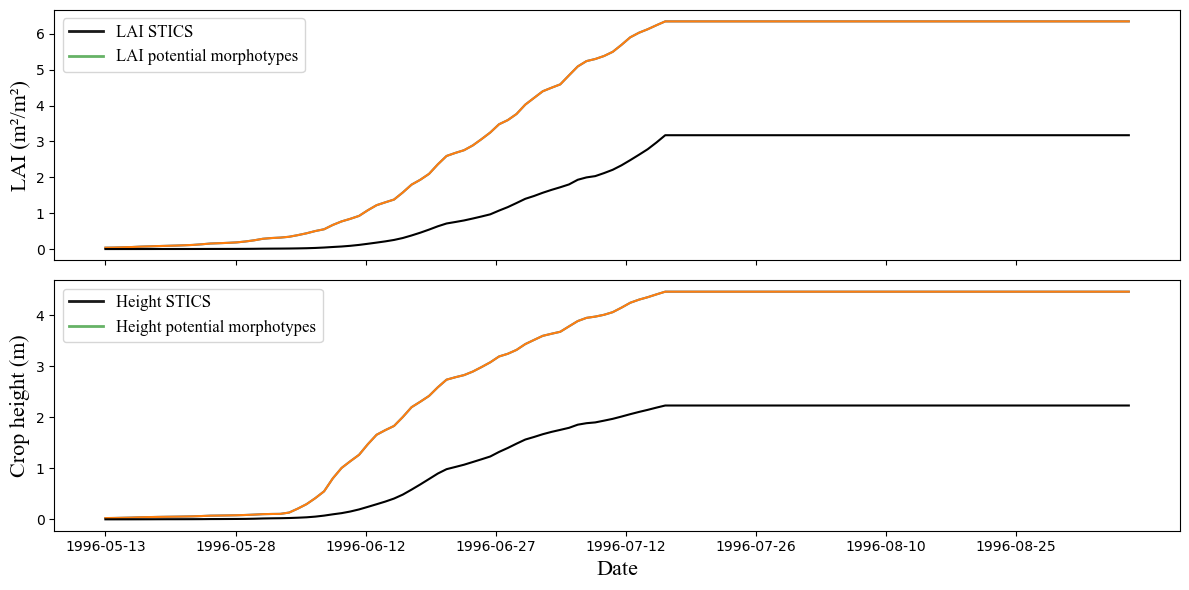

In [6]:
plot_constained_vs_pot(dates, pot_la, pot_h, leaf_area_plant, height_canopy, sowing_density, stics_color="black")

In [ ]:
for key, value in params_sets.items():
    # if filters[key]['filter_1'] and filters[key]['filter_2']:
    #         print(value)
    # if filters[key]['filter_3']:
    #         print(value)
    print(value)

{'nb_short_phy': 4, 'short_phy_height': 3, 'stem_q': 0.9, 'diam_base': 2.2, 'diam_top': 1.2, 'rmax': 0.8, 'skew': 0.01, 'wl': 0.12, 'klig': 0.6, 'swmax': 0.55, 'f1': 0.64, 'f2': 0.92, 'phyllotactic_deviation': 0, 'phyllochron': 55, 'plastochron': 55, 'stem_duration': 1.6, 'leaf_duration': 1.6, 'nb_tillers': 0, 'tiller_angle': 20, 'tiller_delay': 1, 'reduction_factor': 1, 'height': 445.834, 'leaf_area': 6350.2, 'leaf_lifespan': 240.0, 'insertion_angle': 42.0139, 'scurv': 0.7283, 'curvature': 122.363, 'phyllotactic_angle': 152.9319}
{'nb_short_phy': 4, 'short_phy_height': 3, 'stem_q': 0.9, 'diam_base': 2.2, 'diam_top': 1.2, 'rmax': 0.8, 'skew': 0.01, 'wl': 0.12, 'klig': 0.6, 'swmax': 0.55, 'f1': 0.64, 'f2': 0.92, 'phyllotactic_deviation': 0, 'phyllochron': 55, 'plastochron': 55, 'stem_duration': 1.6, 'leaf_duration': 1.6, 'nb_tillers': 0, 'tiller_angle': 20, 'tiller_delay': 1, 'reduction_factor': 1, 'height': 445.834, 'leaf_area': 6350.2, 'leaf_lifespan': 240.0, 'insertion_angle': 10.604

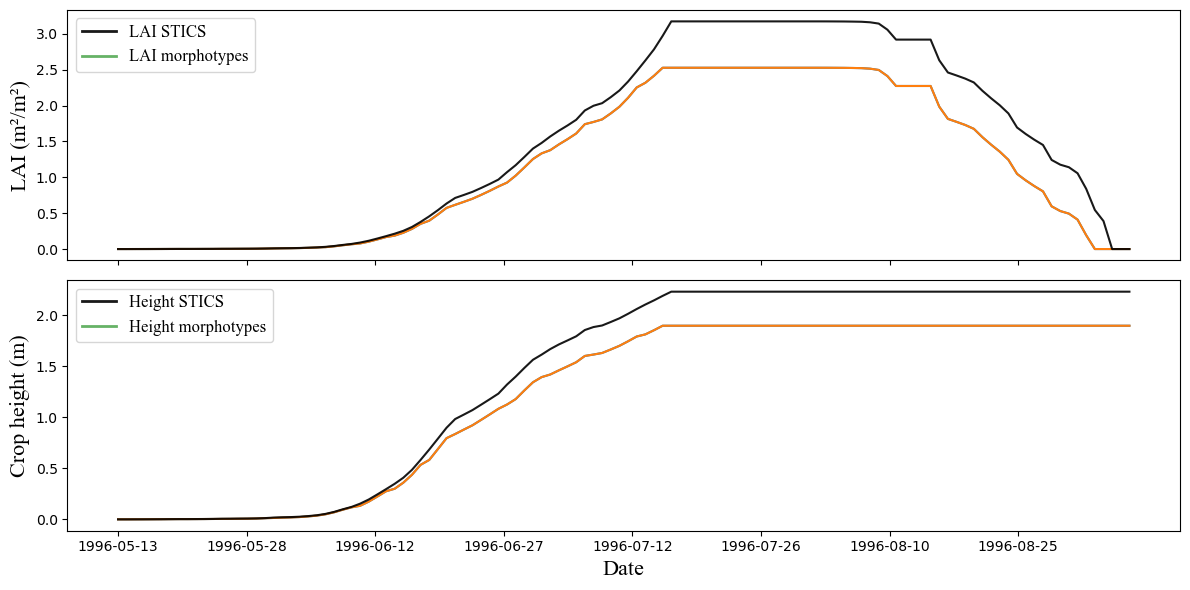

In [8]:
plot_constrainted_vs_realized(dates=dates, 
                              LA_archicrop=realized_la, 
                              height_archicrop=realized_h, 
                              leaf_area_plant=leaf_area_plant, 
                              sen_leaf_area_plant=sen_leaf_area_plant, 
                              height_canopy=height_canopy, 
                              sowing_density=sowing_density,
                              stics_color="black")


In [ ]:
# Energy in Caribu : MJ.day-1
# Irradiance in Caribu : MJ.m[leaf]-2.day-1
# Incident PAR in STICS : MJ.m[soil]-2.day-1
# Absorbed PAR in STICS : MJ.m[soil]-2.day-1

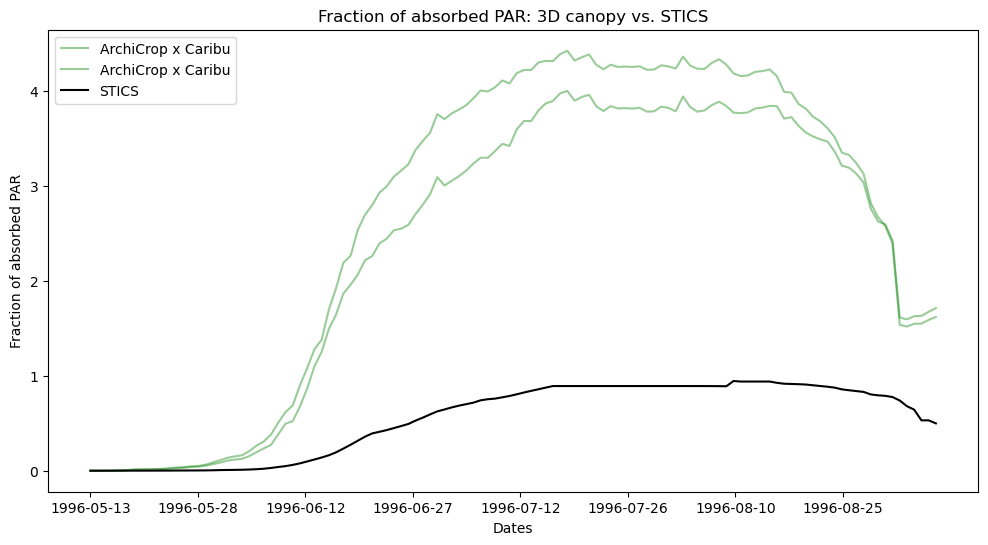

In [10]:
if nrj_per_plant[0][0] is not None:
    plot_faPAR(dates, nrj_per_plant, par_incident, par_stics, sowing_density, stics_color="black")

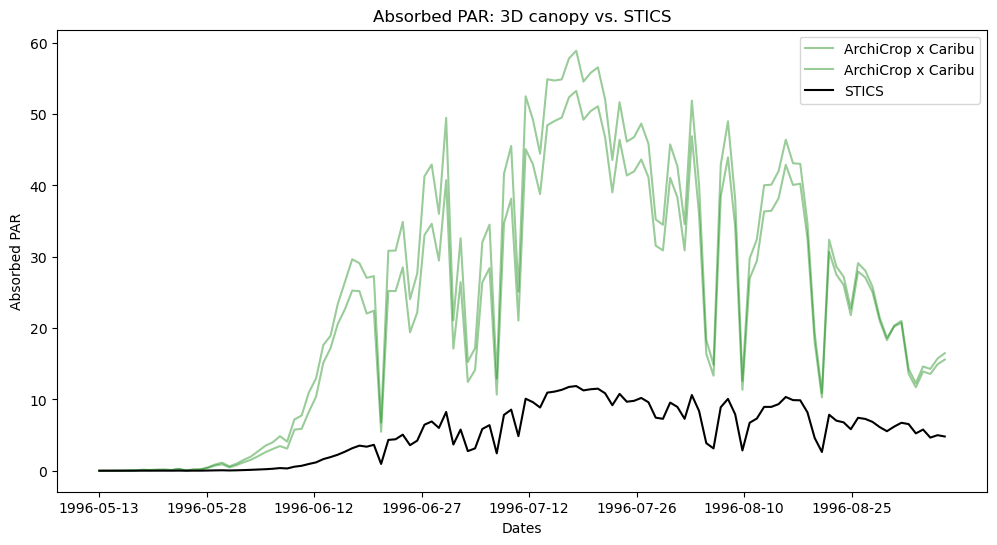

In [11]:
if nrj_per_plant[0][0] is not None:
    plot_PAR(dates, nrj_per_plant, par_incident, par_stics, sowing_density, stics_color="black")

In [12]:
# see if sum eabs and esoil = 1
# see tests caribu (cf light vege manager in oa incubator)
# compute memory 

$$ raint(t)=0.95⋅parsurrgG⋅trg(t)⋅(1−exp(−extinP⋅(lai(t)+eai(t)))) $$

$$ parsurrgG = 0.48 $$

$$ extinP(maize) = 0.7 $$

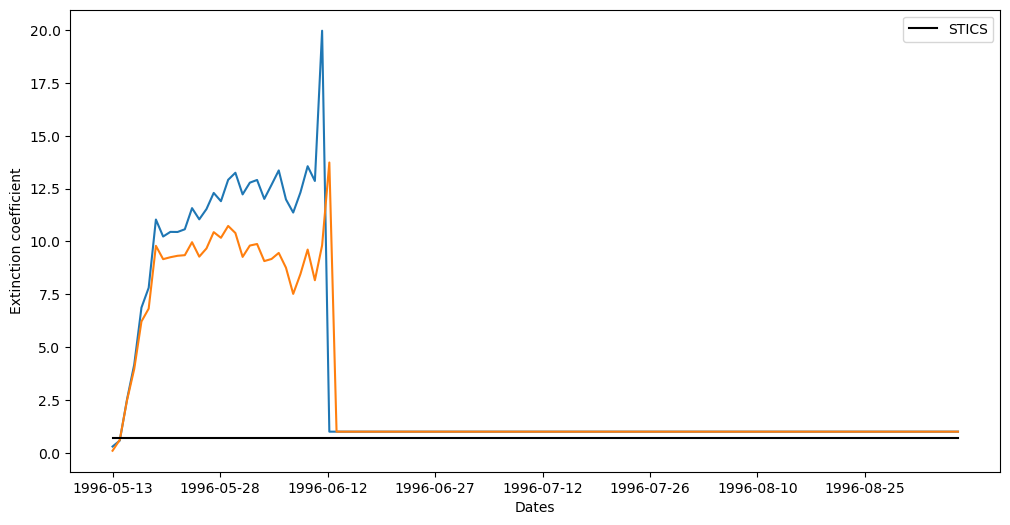

In [ ]:
# Compute coef extinP
import math

extinP_list = []
extinP_sorghum = 0.7

for nrj_time_series in nrj_per_plant.values():
    extinP_per_sim = []
    for i,(nrj,par) in enumerate(zip(nrj_time_series, par_incident)):
        ratio_par_abs = nrj/par
        if ratio_par_abs <= 1:
            lai = leaf_area_plant[i]*sowing_density/10000 
            extinP = -1/lai * math.log(1-ratio_par_abs)
        else:
            extinP = 1
        extinP_per_sim.append(extinP)
    extinP_list.append(extinP_per_sim)

fig, ax = plt.subplots(figsize=(12, 6))
for curve in extinP_list:
    ax.plot(dates, curve)
ax.plot(dates, [extinP_sorghum]*len(dates), color="black", label="STICS")
ax.set_xticks(np.arange(0, len(dates)+1, (len(dates)+1)/8))
ax.set_xlabel("Dates") 
ax.set_ylabel("Extinction coefficient")
ax.legend()
plt.show()

In [14]:
"""
# vertical light interception
cs, ei, df = illuminate(scene, scene_unit='cm')
cs.plot(ei)


# diffuse light interception
sources = skys.sky_sources()
cs, ei, df = illuminate(scene, light=sources, scene_unit='cm')
cs.plot(ei)

# get score per plant
def score(res):
    return pd.Series({'ei':(res.Ei*res.area).sum() / res.area.sum(),
                              'area': res.area.sum()})
df['nump']=nump
df.groupby('nump').apply(score)
"""

"\n# vertical light interception\ncs, ei, df = illuminate(scene, scene_unit='cm')\ncs.plot(ei)\n\n\n# diffuse light interception\nsources = skys.sky_sources()\ncs, ei, df = illuminate(scene, light=sources, scene_unit='cm')\ncs.plot(ei)\n\n# get score per plant\ndef score(res):\n    return pd.Series({'ei':(res.Ei*res.area).sum() / res.area.sum(),\n                              'area': res.area.sum()})\ndf['nump']=nump\ndf.groupby('nump').apply(score)\n"